In [78]:
# Load libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [79]:
# Load db and analyze data
db=pd.read_fwf('skincancer.txt')
db.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [80]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   49 non-null     object 
 1   Lat     49 non-null     float64
 2   Mort    49 non-null     int64  
 3   Ocean   49 non-null     int64  
 4   Long    49 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [81]:
# the data needs standardization
db.describe()

,Lat,Mort,Ocean,Long
count,49.000000,49.000000,49.000000,49.000000
mean,39.532653,152.877551,0.448980,90.936735
std,4.610874,33.428177,0.502545,14.866485
min,28.000000,86.000000,0.000000,69.000000
25%,36.000000,128.000000,0.000000,78.500000
50%,39.500000,147.000000,0.000000,89.500000
75%,43.000000,178.000000,1.000000,100.000000
max,47.500000,229.000000,1.000000,121.000000


In [56]:
# X data standardization and separating X, Y for further manipulations 
# ideally SS is to be fit for train set and transformed for train & test data (but since the db is small, there is no need to do this now)
object=StandardScaler()
Y=db.iloc[:,2]
X=object.fit_transform(db.iloc[:,[1,3,4]])
X_cols=db.iloc[:,[1,3,4]].columns

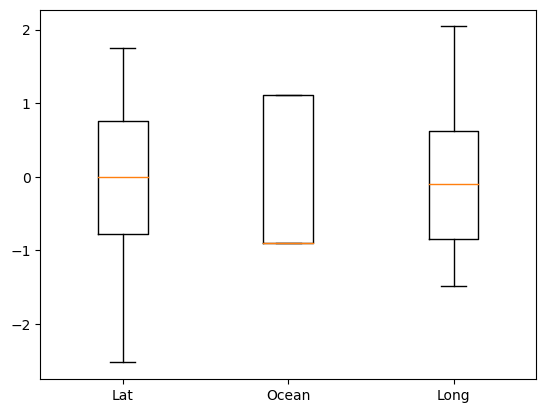

In [83]:
# plotting boxplot to inspect the results of standardization 
plt.boxplot(X)
plt.xticks(np.arange(1,4,step=1),X_cols)
plt.show()

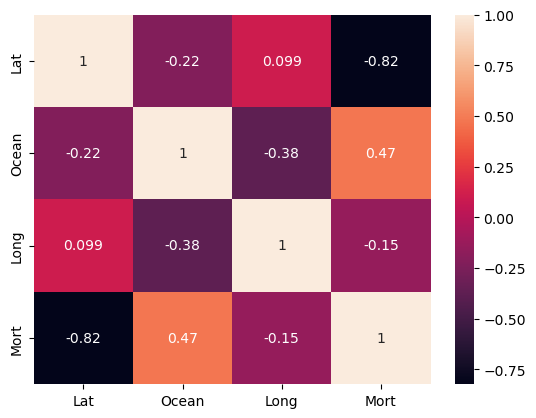

In [84]:
# explorotary data analysis of the codependencies among the variables
# "Mort" (Y) show higher negative correlation with "Lat" and medium positive correlation with "Ocean" variables
st_db=pd.DataFrame(X,columns=X_cols)
st_db['Mort']=Y
sns.heatmap(data = st_db.corr(),annot=True)
plt.show()

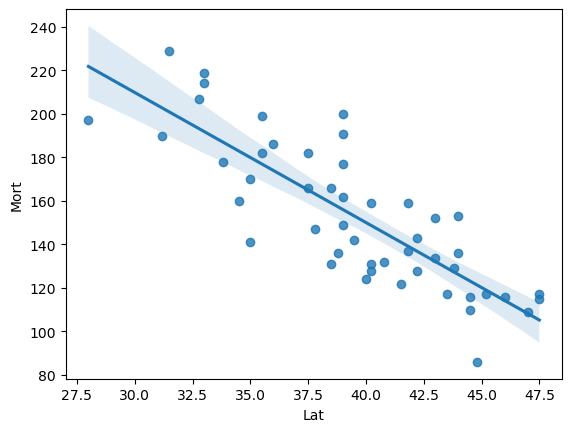

In [90]:
# seaborn regplot show higher negative correlation with "Lat" with a clear trend line
sns.regplot(data=db, x='Lat', y='Mort')
plt.show()

In [97]:
# the goal is to predict "Mort"; since it's a continuous values, we're dealing with a regression (not a classification) problem
# thus we can build a simple linear regression model to predict Y depending upon "Lat"
x = db.Lat
y = db.Mort
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope - %.10s, intercept - %.10s, r_value - %.10s, p_value - %.10s, std_err - %.10s" %
     (slope, intercept, r_value, p_value, std_err))

slope - -5.9776357, intercept - 389.189351, r_value - -0.8245177, p_value - 3.30945619, std_err - 0.59837174


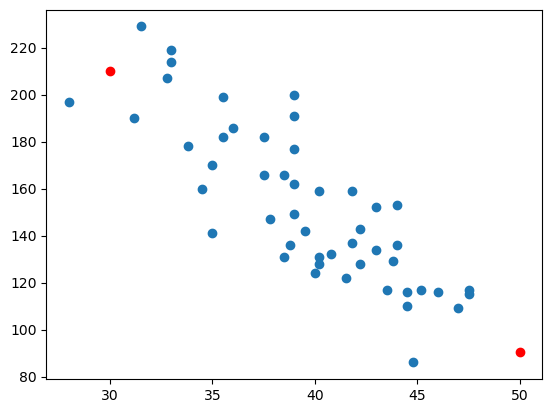

In [98]:
# we can predict "Mort" for new variables lat1 & lat2 and show the predictions (red) on the diagram
lat1=30
lat2=50
y1=slope*lat1+intercept
y2=slope*lat2+intercept
plt.scatter(data=db, x='Lat', y='Mort')
plt.scatter(lat1,y1,c='red')
plt.scatter(lat2,y2,c='red')
plt.show()

In [128]:
# since the db is too simple & small, I won't split train & test data for modeling
# db['Mort_p'] - predictions based upon the LR
# the model shows strong correlation between "Mort_p" (predictions) and real "Mort" values
modelLR=LinearRegression()
modelLR.fit(X, Y)
db['Mort_p'] = modelLR.predict(X)
db['Mort_p']=db['Mort_p'].astype('int64')
print("______________________________________________")
print("R2 coefficient")
print('%.2f' % np.corrcoef(db['Mort_p'],db['Mort'])[0,1])

______________________________________________
R2 coefficient
0.88


In [110]:
# retrieving features importance from the model
# "Lat" & "Ocean" show the highest impact on "Mort" (we can remake and simplify the model and not include "Long")
importance=modelLR.coef_
print(list(X_cols), importance)

['Lat', 'Ocean', 'Long'] [-25.07668447  10.84190343   1.793469  ]


In [129]:
# finally retrieving broad statistical info on the model results by using statsmodels library
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(Y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.83
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.70e-14
Time:                        09:59:11   Log-Likelihood:                -204.75
No. Observations:                  49   AIC:                             417.5
Df Residuals:                      45   BIC:                             425.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8776      2.354     64.933      0.0